In [5]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO



In [26]:
subscription_key = "1f343e9367d54b3f9730c33869ae105e"
search_url = "https://api.bing.microsoft.com/v7.0/images/search"
#search_url = "https://api.cognitive.microsoft.com/bing/v7.0/images/search"
search_term = "puppies"

headers = {"Ocp-Apim-Subscription-Key" : subscription_key}
params  = {"q": search_term, "license": "public", "imageType": "photo"}
response = requests.get(search_url, headers=headers, params=params)
response.raise_for_status()
search_results = response.json()
thumbnail_urls = [img["thumbnailUrl"] for img in search_results["value"]]

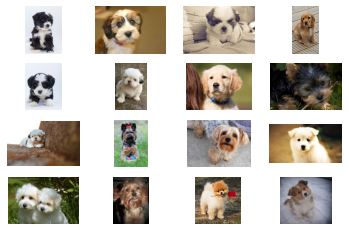

In [14]:
f, axes = plt.subplots(4, 4)
for i in range(4):
    for j in range(4):
        image_data = requests.get(thumbnail_urls[i+4*j])
        image_data.raise_for_status()
        image = Image.open(BytesIO(image_data.content))        
        axes[i][j].imshow(image)
        axes[i][j].axis("off")
plt.show()

In [25]:

f = open('response.txt', "w")
f.write(str(response.json()))
f.close()

In [30]:
def search_images(term, min_sz=128, max_images=150):
    subscription_key = "1f343e9367d54b3f9730c33869ae105e"
    search_url = "https://api.bing.microsoft.com/v7.0/images/search"
    #search_url = "https://api.cognitive.microsoft.com/bing/v7.0/images/search"

    headers = {"Ocp-Apim-Subscription-Key" : subscription_key}
    params  = {"q": term, 'count':max_images, 'min_height':min_sz, 'min_width':min_sz}
    response = requests.get(search_url, headers=headers, params=params)
    response.raise_for_status()
    search_results = response.json()
    return [img["thumbnailUrl"] for img in search_results["value"]]


In [31]:
results = search_images('elefante')

150